In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 8 days


In [54]:
df = pd.read_csv("../main_15min_decomposition_12_daily_weekly_cluster_diff_frac_temp_weekday_200.csv", index_col=0)
df = df.drop(871)
df = df.drop(1169)
w=df[['aggregate_%d' %i for i in range(1,13)]]
dfc = df.copy()
df = df.ix[w[w>0].dropna().index]
max_aggregate = df[["aggregate_%d" % i for i in range(1, 13)]].max().max()
df[["aggregate_%d" % i for i in range(1, 13)]] = df[["aggregate_%d" % i for i in range(1, 13)]].div(max_aggregate)


max_weekly = df[["daily_usage_%d" % i for i in range(1, 8)]].max().max()
df[["daily_usage_%d" % i for i in range(1, 8)]] = df[["daily_usage_%d" % i for i in range(1, 8)]].div(max_weekly)

df['area'] = df['area'].div(df['area'].max())

df['num_rooms'] = df['num_rooms'].div(df['num_rooms'].max())
df['total_occupants'] = df['total_occupants'].div(df['total_occupants'].max())
df['mins_hvac'] =  df['mins_hvac'].div(df['mins_hvac'].max())

max_cols = {}
for col in ["stdev_trend_12","stdev_seasonal_12","max_seasonal_12","max_trend_12",
            "stdev_trend_daily","stdev_seasonal_daily","max_seasonal_daily","max_trend_daily",
            "stdev_trend_weekly","stdev_seasonal_weekly","max_seasonal_weekly","max_trend_weekly","disag_fridge",
            'stdev_trend','stdev_seasonal','max_seasonal','max_trend',
            'cluster_small','cluster_big', 'temperature_corr']:
    if col in df.columns:
        max_cols[col] = dfc[col].max()
        df[col] = df[col].div(df[col].max())
aa = df[["aggregate_%d" % i for i in range(1, 13)]].copy()
df['variance'] = df[["aggregate_%d" % i for i in range(1, 13)]].var(axis=1)
df['ratio_min_max'] = aa.min(axis=1)/aa.max(axis=1)

df['difference_min_max'] = aa.max(axis=1)-aa.min(axis=1)
df['ratio_difference_min_max'] = (aa.max(axis=1)-aa.min(axis=1)).div(aa.max(axis=1))

In [3]:
import statsmodels.api as sm


def decompose(df, freq=96):
    res = sm.tsa.seasonal_decompose(df.fillna(method='ffill').values, freq=freq)
    return pd.DataFrame({"seasonal":res.seasonal, "trend":res.trend, "obs":res.observed}, index=df.index)



In [4]:
df.describe()

,aggregate_1,aggregate_2,aggregate_3,aggregate_4,aggregate_5,aggregate_6,aggregate_7,aggregate_8,aggregate_9,aggregate_10,...,daily_usage_5,daily_usage_6,daily_usage_7,area,num_rooms,total_occupants,variance,ratio_min_max,difference_min_max,ratio_difference_min_max
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.000000,57.000000,56.000000,56.000000,52.000000,57.000000,57.000000,57.000000,57.000000
mean,0.218754,0.175169,0.200288,0.204278,0.282759,0.418136,0.439046,0.493739,0.390751,0.254473,...,0.340635,0.356962,0.344012,0.574250,0.602679,0.511538,0.017012,0.320446,0.346339,0.679554
std,0.135996,0.106169,0.121484,0.122358,0.150816,0.187365,0.187626,0.207867,0.164047,0.134188,...,0.163864,0.154795,0.150095,0.178310,0.225849,0.232340,0.013090,0.101587,0.152108,0.101587
min,0.065169,0.050859,0.060874,0.070970,0.087910,0.104358,0.100985,0.082996,0.117798,0.078218,...,0.106601,0.127047,0.126329,0.274286,0.166667,0.000000,0.000194,0.119901,0.042386,0.251410
25%,0.134303,0.115163,0.112400,0.112888,0.169510,0.276252,0.296643,0.322065,0.245204,0.148273,...,0.201282,0.225741,0.219931,0.448500,0.416667,0.400000,0.006891,0.259591,0.234264,0.651133
50%,0.186758,0.146551,0.176726,0.187132,0.267250,0.384382,0.401293,0.501874,0.378830,0.215229,...,0.341980,0.348226,0.336916,0.571429,0.583333,0.400000,0.015204,0.308511,0.350552,0.691489
75%,0.243340,0.212305,0.251871,0.242627,0.351546,0.502331,0.538773,0.609595,0.492651,0.348059,...,0.413806,0.424348,0.409816,0.702500,0.770833,0.800000,0.023601,0.348867,0.432740,0.740409
max,0.932131,0.733477,0.749865,0.733155,0.784175,1.000000,0.940040,0.970850,0.869814,0.744823,...,1.000000,0.940866,0.920930,1.000000,1.000000,1.000000,0.060626,0.748590,0.730947,0.880099


In [5]:
features_individual = {'fraction':["fraction_%d" % i for i in range(1, 25)],
                       'area': 'area',
                       'autocorr':'autocorr',
                       'month': ["aggregate_%d" % i for i in range(1, 13)],
                       'occupants': 'total_occupants',
                       'rooms': 'num_rooms',
                       'seasonal_12':['stdev_seasonal_12','max_seasonal_12'],
                       'trend_12':['stdev_trend_12','max_trend_12'],
                       'seasonal_daily':['stdev_seasonal_daily','max_seasonal_daily'],
                       'trend_daily':['stdev_trend_daily','max_trend_daily'],
                       'seasonal_weekly':['stdev_seasonal_weekly','max_seasonal_weekly'],
                       'trend_weekly':['stdev_trend_weekly','max_trend_weekly'],
                       'disag_fridge':'disag_fridge',
                       'mins_hvac':'mins_hvac',
                       'cluster_big':'cluster_big',
                       'diff':['lt_500','bet_500_1000','gt_1000'],
                       'temp':'temperature_corr',
                       'month_extract':['variance','ratio_min_max', 'difference_min_max',
                                        'ratio_difference_min_max']}

from itertools import combinations
features_dict = {}
for feature_size in range(1,max(4,len(features_individual))):
    combinations_size_n = list(combinations(features_individual.keys(), feature_size))
    for com in combinations_size_n:
        features_dict[com] = np.hstack([features_individual[x] for x in com]).tolist()


dfs = {}
total = features_dict.values()[np.array(map(len, features_dict.values())).argmax()]
for appliance in ['fridge','hvac','dr','light','dw','wm']:
    temp=df.ix[df[['%s_%d' %(appliance, i) for i in range(1,13)]].dropna().index]
    dfs[appliance] =temp.ix[temp[total].dropna().index]


all_homes = {appliance:dfs[appliance].index for appliance in dfs.keys()}
all_homes['fridge'] = np.array(np.setdiff1d(all_homes['fridge'], [2233, 5746, 7016, 26, 1334, 6836, 1642, 3482, 9982]))
all_homes['hvac'] = np.array(np.setdiff1d(all_homes['hvac'], [252, 2925, 2986, 3482, 4732, 5439, 6266,
                                                              8626, 1800, 2233, 5817, 7016, 7429, 8317,
                                                              9052, 9982]))
all_homes['dw'] =  np.array(np.setdiff1d(all_homes['dw'],[2233, 7016]))
all_homes['wm'] = np.array([  94,  370,  545,  624, 2156, 2242, 2470, 2814, 3367, 3456, 3723,
            3967, 5357, 7769, 9654, 9922, 9934])


In [6]:
df_appl = {appl:df.ix[all_homes[appl]].copy() for appl in ['fridge','hvac','dr','light','dw','wm']}

In [7]:
import os
st = pd.HDFStore(os.path.expanduser("~/Downloads/wiki-temp.h5"))

### Homes with similar short term frequency decomposition have similar fridge usage

In [8]:
st['/26']['refrigerator1']['2013'].resample("1M")

localminute
2013-01-31 00:00:00-06:00     0.000000
2013-02-28 00:00:00-06:00     0.000000
2013-03-31 00:00:00-05:00     0.000000
2013-04-30 00:00:00-05:00     0.000000
2013-05-31 00:00:00-05:00     0.000000
2013-06-30 00:00:00-05:00     0.128750
2013-07-31 00:00:00-05:00     0.000000
2013-08-31 00:00:00-05:00     0.000000
2013-09-30 00:00:00-05:00     0.000000
2013-10-31 00:00:00-05:00     0.000000
2013-11-30 00:00:00-06:00    43.254917
2013-12-31 00:00:00-06:00    61.660908
Freq: M, Name: refrigerator1, dtype: float32

In [79]:
dfs_fridge = {}
corrs = {}
for home in all_homes['fridge'][:]:
    temp = st['/%d' %home]['2013'][:'2013-1-30'][['use','refrigerator1','air1']].resample("15T")
    ref_med = temp['refrigerator1'][temp['refrigerator1']>20].median()
    decomposed_df = decompose(temp['use'], freq=12)
    max_seasonal = decomposed_df.seasonal.max()
    corrs[home] = {'max_seasonal':max_seasonal, 'median_ref':ref_med, 'std_seasonal':decomposed_df.seasonal.std(),'seasonal_sum':(decomposed_df.seasonal + np.abs(decomposed_df.seasonal.min())).sum()}
    dfs_fridge[home] = pd.DataFrame({"fridge":temp['refrigerator1'], 
                                     'seasonal':decomposed_df.seasonal, 
                                     
                                     'seasonal_lifted':decomposed_df.seasonal + np.abs(decomposed_df.seasonal.min()),
                                     
                                     'trend':decomposed_df.trend,
                                    "use":temp['use'],
                                     "hvac":temp['air1']
                                    })

In [83]:
dfs_fridge[home]['seasonal_lifted'].resample("1M", how="sum")

localminute
2013-01-31 00:00:00-06:00    114913.207123
Freq: M, Name: seasonal_lifted, dtype: float64

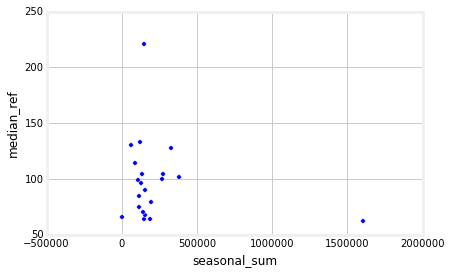

In [80]:
pd.DataFrame(corrs).T.plot(kind="scatter",x="seasonal_sum",y="median_ref")

In [81]:
pd.DataFrame(corrs).T.corrwith(df_appl['fridge']['fridge_4'])

max_seasonal   -0.076820
median_ref      0.889304
seasonal_sum   -0.106289
std_seasonal   -0.104084
dtype: float64

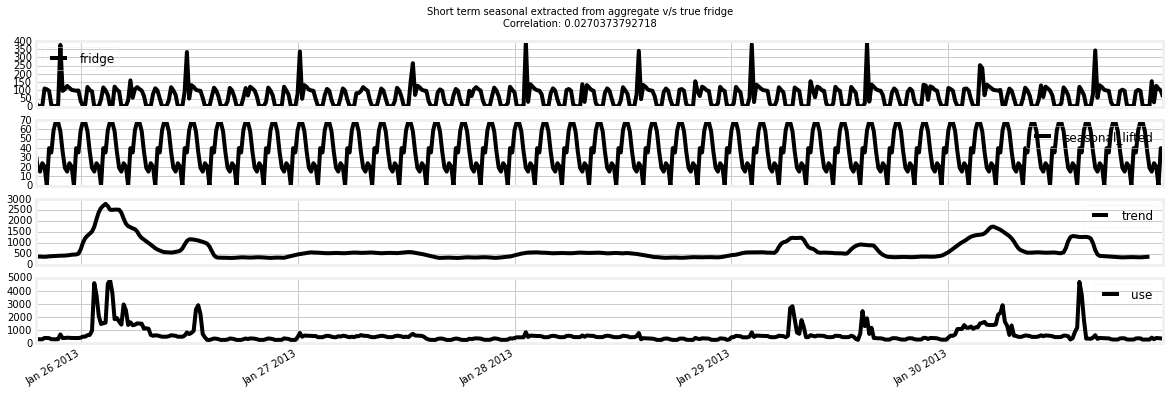

In [91]:
dfs_fridge[94][['fridge', 'seasonal_lifted', 'trend','use']].tail(500).plot(subplots=True, sharey=False, figsize=(18,6))
plt.xlabel("")

corr = dfs_fridge[94][['fridge', 'seasonal_lifted']].corr().values[0, 1]
plt.suptitle("Short term seasonal extracted from aggregate v/s true fridge\nCorrelation: "+str(corr))
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/figures/new/fridge_seasonal_aggregate_94.png")

In [34]:
fridge_delta = {}
for home in df_appl['fridge'].index:
    fdf = st['/%d' %home]['2013']['refrigerator1'].resample("15T").dropna()
    fridge_delta[home] = fdf[fdf>5].median()


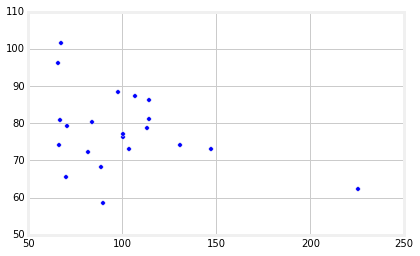

In [55]:
plt.scatter(pd.Series(fridge_delta), max_cols['cluster_small']*df_appl['fridge']['cluster_small'])

In [56]:
pd.Series(fridge_delta).corr(df_appl['fridge']['cluster_small'])

-0.36599992105552603

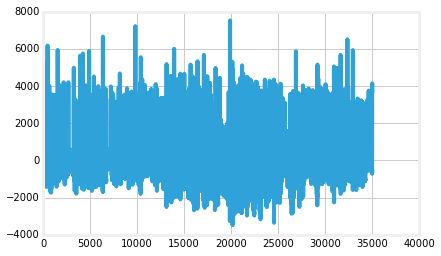

In [13]:
a=dfs_fridge[370]
plt.plot(a['use']-a['trend'])

In [118]:
x = st['/9982']['use']['2013'].resample('15T').dropna().values
fs = 1
from scipy import signal
f, Pxx_den = signal.periodogram(x, fs)

In [127]:

from pandas.tools.plotting import autocorrelation_plot

In [111]:
s = st['/94']['use']['2013'][:'2013-01-30'].resample('15T').dropna()
y = []
for lag in range(1, 192, 1):
    y.append(s.autocorr(lag=lag))

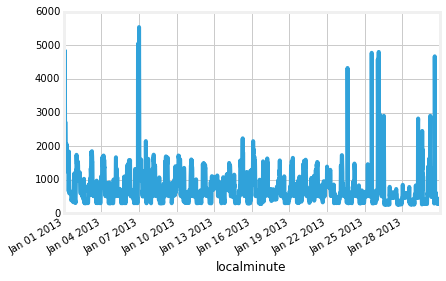

In [112]:
s.plot()

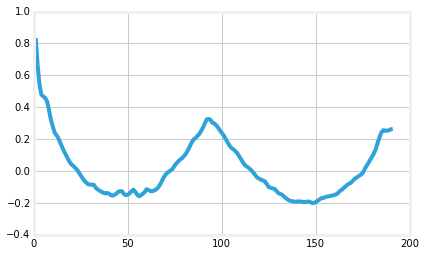

In [113]:
plt.plot(range(1, 192, 1), y)

In [114]:
import scipy
days_to_seconds = 60 * 60 * 24
seconds_to_days = 1.0 / days_to_seconds
nout = 10000 # number of frequency-space points at which to calculate the signal strength (output)
periods = np.linspace(days_to_seconds/(24*15), days_to_seconds, nout)
freqs = 1.0 / periods
angular_freqs = 2 * np.pi * freqs
pgram = scipy.signal.lombscargle(900*np.arange(len(s)).astype('float'), s.values.astype('float'), angular_freqs)


In [115]:
periods

array([   240.        ,    248.61686169,    257.23372337, ...,
        86382.76627663,  86391.38313831,  86400.        ])

([<matplotlib.axis.XTick at 0x1347aba10>,
 <a list of 2 Text xticklabel objects>)

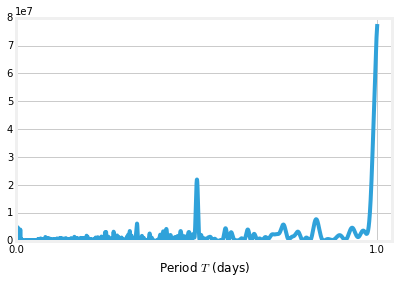

In [116]:
plt.plot(periods, pgram)
plt.xlabel('Period $T$ (days)')
#plt.axvline(days_to_seconds, lw=2, color='red', alpha=0.4)
day_ticks, day_labels = np.arange(2) * days_to_seconds, ['{:2.1f}'.format(t) for t in np.arange(10)]
plt.xticks(day_ticks, day_labels)

In [94]:
st['/9982']['use']['2013'].resample('15T').dropna().autocorr(lag=96)

0.54737285719190043

In [ ]:
st['/9982']['use']['2013'].resample('15T').dropna().autocorr

In [121]:
f[1]

2.8604118993135013e-05

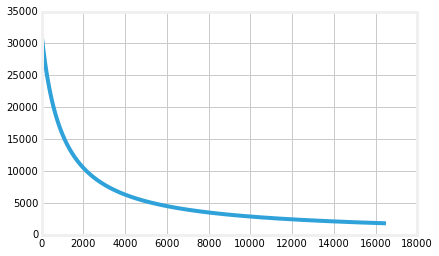

In [105]:
plt.plot(1./f[1000:])

1

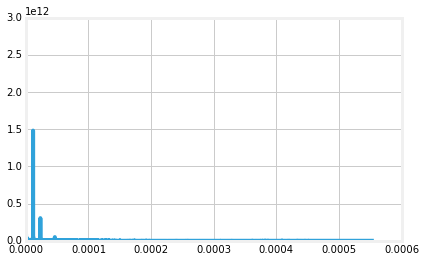

In [112]:
plt.plot(f, Pxx_den)

np.argmax(Pxx_den)

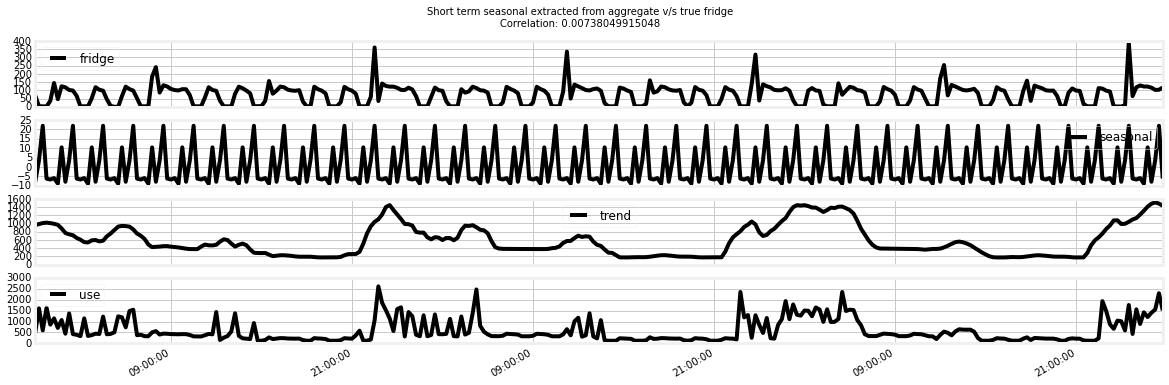

In [55]:
dfs_fridge[94][['fridge', 'seasonal', 'trend','use']]['2013-05-20':].head(300).plot(subplots=True, sharey=False, figsize=(18,6))
plt.xlabel("")

corr = dfs_fridge[94][['fridge', 'seasonal']].corr().values[0, 1]
plt.suptitle("Short term seasonal extracted from aggregate v/s true fridge\nCorrelation: "+str(corr))
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/figures/new/fridge_seasonal_aggregate_33670.png")

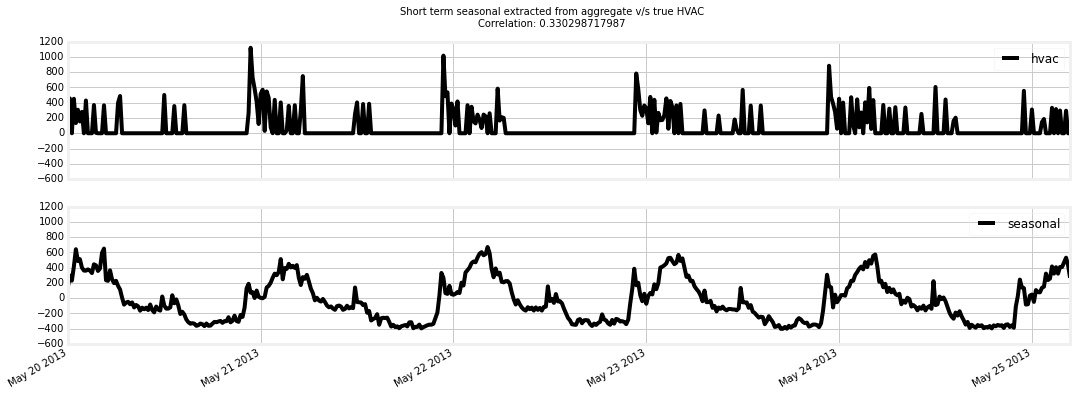

In [185]:
dfs_fridge[94][['hvac', 'seasonal']]['2013-05-20':].head(500).plot(subplots=True, sharey=True, figsize=(16,6))
plt.xlabel("")
corr = dfs_fridge[94][['hvac', 'seasonal']]['2013-05-20':'2013-10-30'].corr().values[0, 1]
plt.suptitle("Short term seasonal extracted from aggregate v/s true HVAC\nCorrelation: "+str(corr))
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/figures/new/hvac_seasonal_aggregate_94.png")

In [58]:
def plot_correlations(df, appliance, feature):
    months = ["Jan", "Feb", "Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    if appliance is not "hvac":
        fig, ax = plt.subplots(ncols=6, nrows=2, sharey=True, sharex=True, figsize=(16,6))
        for month in range(1, 13):
            ax[(month-1)/6, (month-1)%6].scatter(df[feature],df['%s_%d' %(appliance, month)])
            ax[(month-1)/6, (month-1)%6].set_title(df[[feature, '%s_%d' %(appliance, month)]].corr().values[0, 1])
            ax[(month-1)/6, (month-1)%6].set_xlabel(months[month-1])
        ax[0,0].set_ylabel("Energy (kWh)")
        ax[1,0].set_ylabel("Energy (kWh)")
    else:
        fig, ax = plt.subplots(ncols=6, nrows=1, sharey=True, sharex=True, figsize=(16,3))
        for month in range(5, 11):
            ax[month-5].scatter(df[feature],df['%s_%d' %(appliance, month)])
            ax[month-5].set_title(df[[feature, '%s_%d' %(appliance, month)]].corr().values[0, 1])
            ax[month-5].set_xlabel(months[month-1])
        ax[0].set_ylabel("Energy (kWh)")
    plt.tight_layout()

In [191]:
(df_appl[appliance][['fridge_%d' %i for i in range(1, 13)]]<=0).sum(axis=1)

26       9
94       0
370      0
410      0
545      0
624      0
1334     1
1642     9
1953     0
2156     0
2242     0
2814     0
3367     0
3456     0
3482     9
3723     0
3967     0
4767     0
5357     0
5371     0
6072     0
6636     0
6836    11
6910     0
7769     0
7866     0
9982     5
dtype: int64

In [209]:
df_appl[appliance][['daily_usage_%d'  %i for i in range(1,8)]].describe()

,daily_usage_1,daily_usage_2,daily_usage_3,daily_usage_4,daily_usage_5,daily_usage_6,daily_usage_7
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.350073,0.359684,0.360544,0.358495,0.372117,0.382866,0.362090
std,0.189866,0.197351,0.193766,0.195735,0.203190,0.184897,0.179553
min,0.134528,0.130293,0.131174,0.128471,0.134714,0.172058,0.164123
25%,0.197282,0.194282,0.201284,0.212759,0.208983,0.227803,0.219931
50%,0.322424,0.341676,0.343959,0.341688,0.348940,0.371393,0.337502
75%,0.408641,0.462829,0.461497,0.451190,0.460239,0.461824,0.441957
max,0.936355,0.960964,0.961320,0.968947,1.000000,0.940866,0.920930


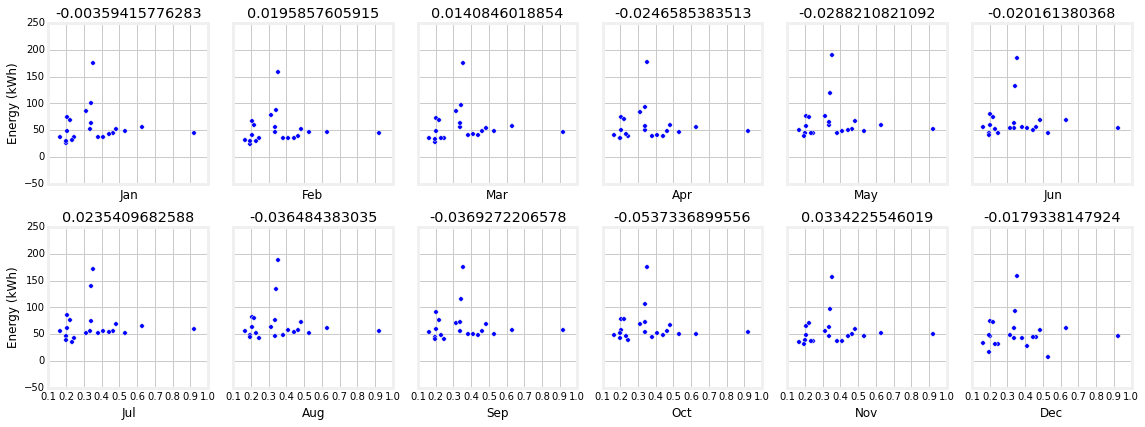

In [220]:
appliance="fridge"
feature='daily_usage_7'
plot_correlations(df_appl[appliance], appliance, feature)
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/figures/new/%s_%s.png" %(appliance, feature), bbox_inches="tight")

In [1]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
feature1='max_seasonal_weekly'
feature2='aggregate_8'
month=8
appliance='hvac'
ax.scatter(df_appl['hvac'][feature1],df_appl['hvac'][feature1],df_appl['hvac']['%s_%d' %(appliance, month)])
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('hvac_8')

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 8 days


NameError: name 'plt' is not defined

In [2]:
df_appl["hvac"][['aggregate_8','autocorr']].corr()

NameError: name 'df_appl' is not defined

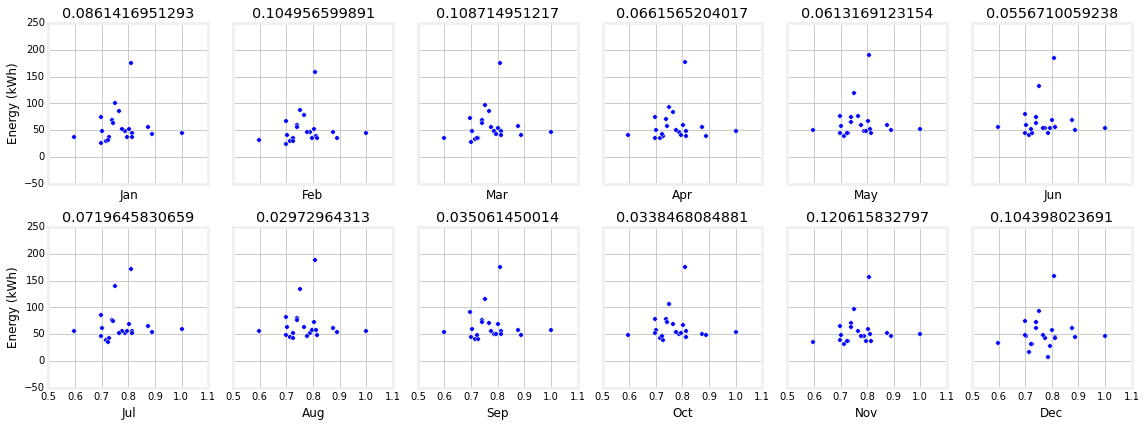

In [119]:
appliance="fridge"
feature='disag_fridge'
plot_correlations(df_appl[appliance], appliance, feature)
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/figures/new/%s_%s.png" %(appliance, feature), bbox_inches="tight")

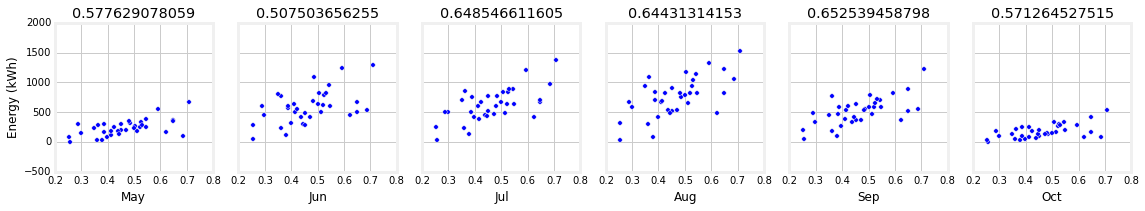

In [191]:
appliance="hvac"
feature='autocorr'
plot_correlations(df_appl[appliance], appliance, feature)
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/figures/new/%s_%s.png" %(appliance, feature), bbox_inches="tight")

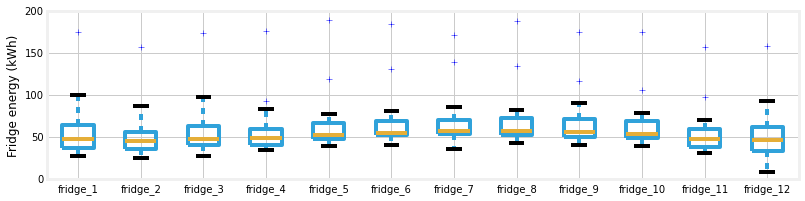

In [210]:
df_appl['fridge'][['fridge_%d' %i for i in range(1, 13)]].plot(kind="box", figsize=(12, 3))
plt.ylabel("Fridge energy (kWh)")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/figures/new/fridge_boxplot.png")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1476a3d90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1471d4850>]], dtype=object)

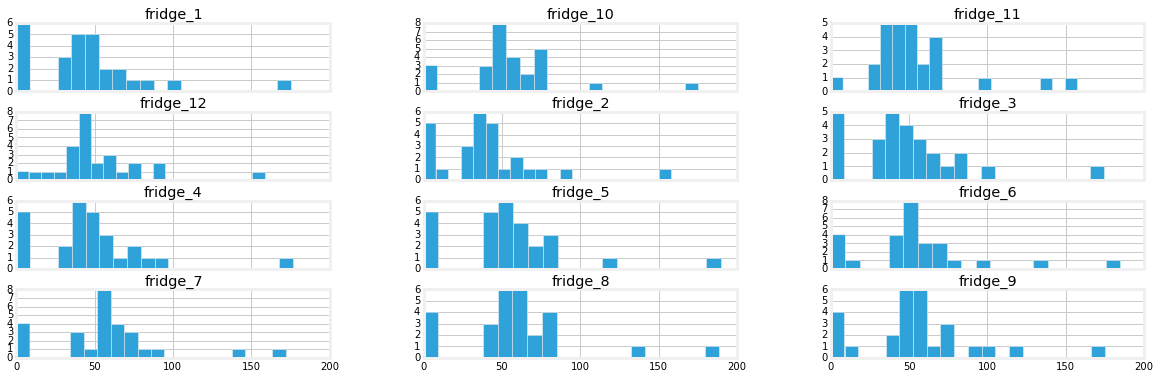

In [61]:
df_appl['fridge'][['fridge_%d' %i for i in range(1, 13)]].hist(figsize=(18, 6), bins=20, sharex=True)

In [217]:
temp = (df_appl['hvac'][['hvac_%d' %i for i in range(1, 13)]]-df_appl['hvac'].ix[370][['hvac_%d' %i for i in range(1, 13)]]).abs().sum(axis=1)
temp = temp.drop(370)
temp.sort()
temp.head(5)

2814    333.353115
3367    412.534132
545     573.549753
2129    656.146658
1283    897.211371
dtype: float64

In [ ]:
fig, ax = plt.subplots(nrows=1, figsize=(16, 6))
dfs_hvac[370]['trend'][:].plot(ax=ax,label="370")
dfs_hvac[94]['trend'][:].plot(ax=ax, label="94")
dfs_hvac[2814]['trend'][:].plot(ax=ax, label="2814")
dfs_hvac[3367]['trend'][:].plot(ax=ax, label="3367")

plt.legend()
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/figures/new/hvac_trend.png", bbox_inches="tight")
plt.xlabel("")

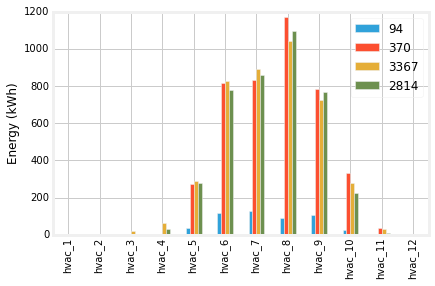

In [243]:
df_appl["hvac"].ix[[94, 370, 3367, 2814]][['hvac_%d' %i for i in range(1, 13)]].T.plot(kind="bar")
plt.ylabel("Energy (kWh)")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/figures/new/hvac_trend_gt.png")

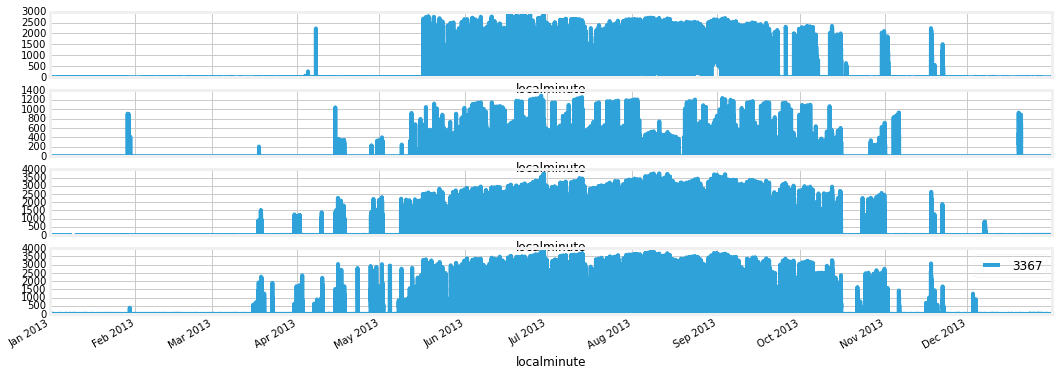

In [235]:
fig, ax = plt.subplots(sharex=True, nrows=4, figsize=(16,6))
dfs_hvac[370]['hvac'][:].plot(ax=ax[0],label="370")
dfs_hvac[94]['hvac'][:].plot(ax=ax[1], label="94")
dfs_hvac[2814]['hvac'][:].plot(ax=ax[2], label="2814")
dfs_hvac[3367]['hvac'][:].plot(ax=ax[3], label="3367")


plt.legend()

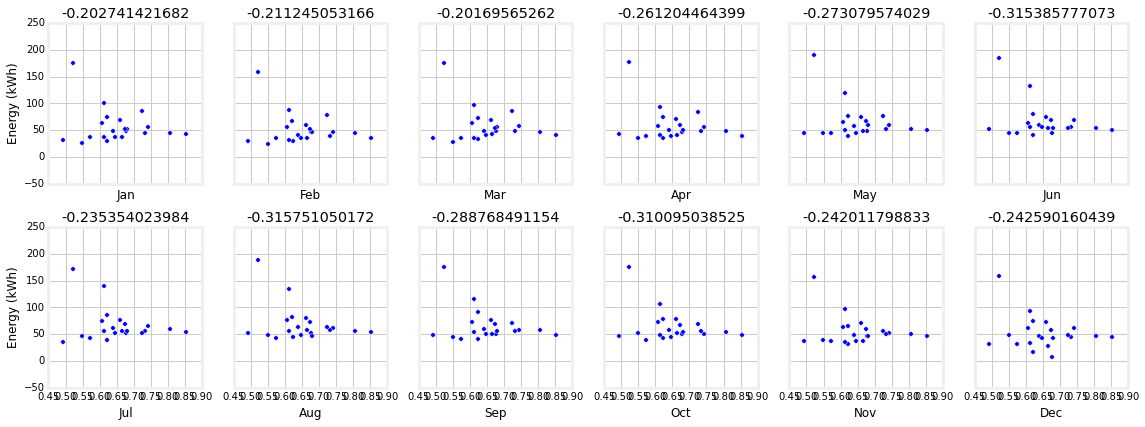

In [59]:
appliance="fridge"
feature='cluster_small'
plot_correlations(df_appl[appliance], appliance, feature)
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/figures/new/%s_%s.png" %(appliance, feature), bbox_inches="tight")

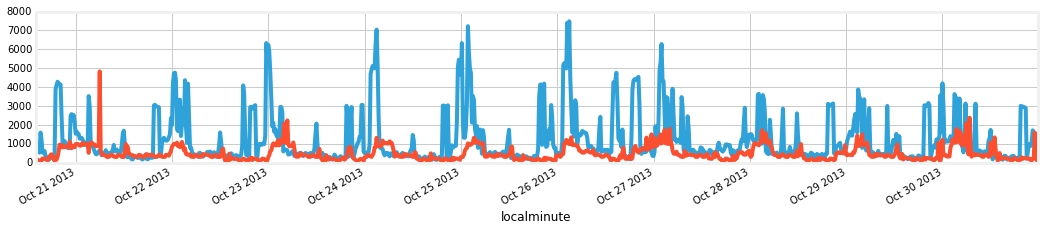

In [194]:
st['/26']['2013-05-01':'2013-10-30']['use'].resample("15T").tail(1000).plot(figsize=(16,3))
st['/94']['2013-05-01':'2013-10-30']['use'].resample("15T").tail(1000).plot(figsize=(16,3))



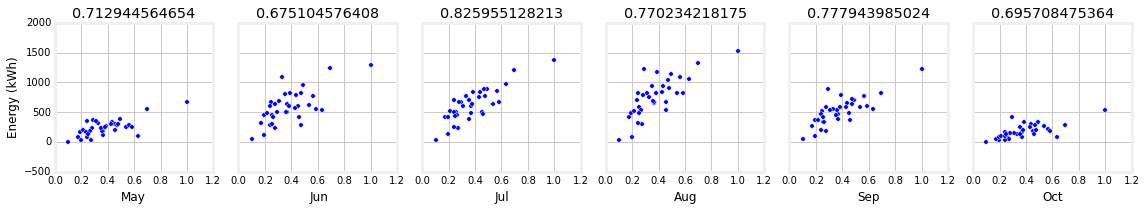

In [141]:
plot_correlations(df_appl['hvac'], 'hvac', 'stdev_seasonal_weekly')

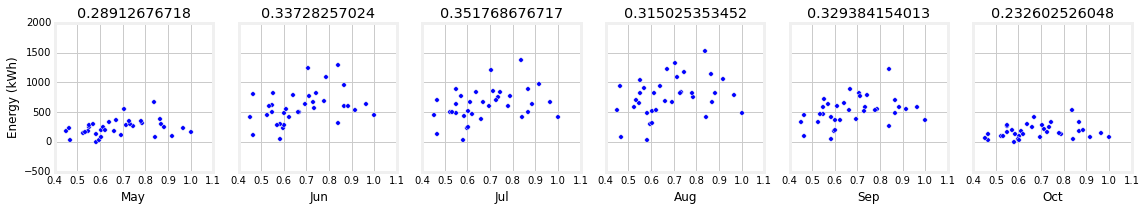

In [158]:
plot_correlations(df_appl['hvac'], 'hvac', 'temperature_corr')

In [ ]:
decompose()